## Neural Network Classification with PyTorch
Classification tasks are basically differentiating between something, or predicting whether something is one thing or another. There are three major types of classification in the realm of Machine Learning:
* **Binary Classification** - Differentiating between two things (e.s. Cat or Dog, Yes or No, 1 or 0, True or False, etc.)</br></br>
* **Multiclass Classification** - Differentiating between more than two things (e.s. Cat or Dog or Cow or Fox, etc.)</br></br>
* **Multi-label Classification** - Differentiating between two or more things with multiple labels for each (e.s. Article category, Related news, Recommendation, etc)</br>
<img src="../resources/Classification_types.jpg"></img>
</br></br>
#### Get Started with some custom data
We will make our own custom dataset to properly learn how the classification tasks are being done.

In [1]:
# Import scikit-learn module and import make_circles data
import sklearn
from sklearn.datasets import make_circles

# Make a thousand smaples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                   noise=0.04,
                   random_state=42)

In [2]:
print(f"Length of Data\t: {len(X)}\nLength of Label\t: {len(y)}")

Length of Data	: 1000
Length of Label	: 1000


In [3]:
print(f"First 5 samples of X:\n{X[:5]}\n")
print(f"First 5 samples of y:\n{y[:5]}\n")

First 5 samples of X:
[[ 0.74822656  0.23908325]
 [-0.74509559  0.16097526]
 [-0.82262532  0.19762051]
 [-0.41143316  0.68255648]
 [ 0.44390494 -0.89582949]]

First 5 samples of y:
[1 1 1 1 0]



#### View the data as a DataFrame

In [4]:
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y})
circles.head(10)

,X1,X2,label
0,0.748227,0.239083,1
1,-0.745096,0.160975,1
2,-0.822625,0.197621,1
3,-0.411433,0.682556,1
4,0.443905,-0.895829,0
5,-0.474766,0.692236,1
6,-0.014847,0.804486,1
7,0.765568,0.153643,1
8,-0.172507,-0.796646,1
9,-0.116051,1.031858,0


#### Visualize the data

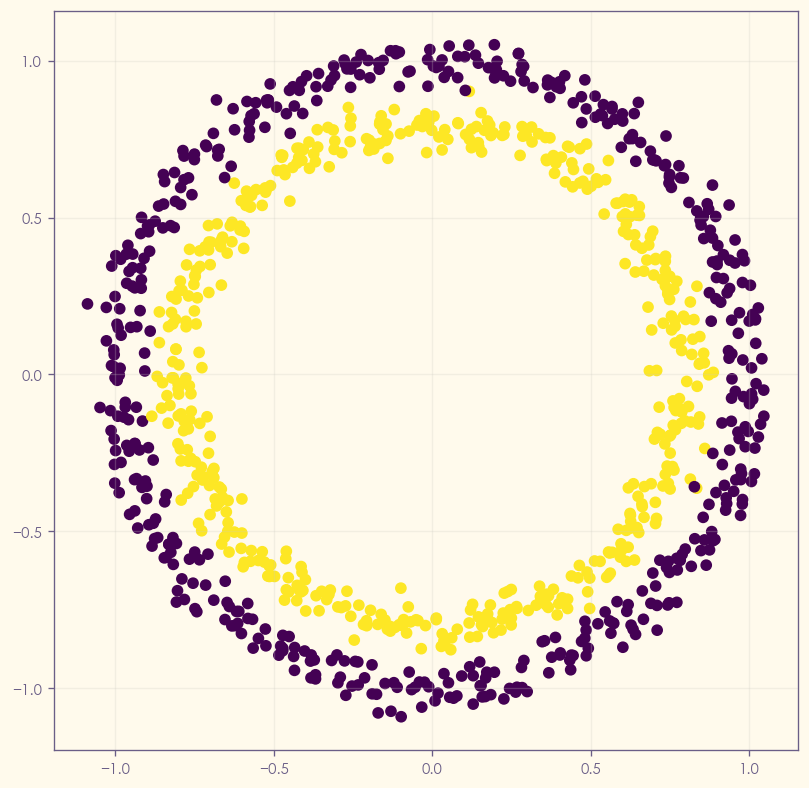

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.scatter(x = X[:, 0],
            y = X[:, 1],
            c = y)
plt.show()

*Note: This dataset is often known or referred as the 'toy dataset'. This dataset is small for experiments but sizeable enough to practice, or play with the fundamentals of Machine Learning.

#### Check shapes

In [6]:
print(f"Shape of Data\t: {X.shape}\nShape of Label\t: {y.shape}")

Shape of Data	: (1000, 2)
Shape of Label	: (1000,)


In [7]:
# View the first example of featuires and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.74822656 0.23908325] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


#### Turn the data into Tensors

In [8]:
import torch

# Check the version
print(f"PyTorch Version: {torch.__version__}")

PyTorch Version: 2.5.1


In [9]:
# Turn the data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [10]:
# Let's check the values now
print(f"First 5 values of X:\n{X[:5], X.dtype}\n\nFirst 5 values of y:\n{y[:5], y.dtype}")

First 5 values of X:
(tensor([[ 0.7482,  0.2391],
        [-0.7451,  0.1610],
        [-0.8226,  0.1976],
        [-0.4114,  0.6826],
        [ 0.4439, -0.8958]]), torch.float32)

First 5 values of y:
(tensor([1., 1., 1., 1., 0.]), torch.float32)


In [11]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, #20% test 80% train
                                                    random_state=42)

print(f"Length of Train splits\t: {len(X_train), len(y_train)}")
print(f"Length of Test splits\t: {len(X_test), len(y_test)}")

Length of Train splits	: (800, 800)
Length of Test splits	: (200, 200)


## Building a Model
Let's build a model to classify our different color dots.</br>
We need to do:
* Setup device agnostic code
* Construct a model (by using `nn.Module()`)
* Define a `Loss Function` and `Optimizer`
* Create a training and testing loop

In [12]:
# Import nn
from torch import nn

# Make device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Active Device: {device}")

Active Device: cuda


#### Constructing a Model
To create a model, we need to:
* Use subclass `nn.Module()`
* Create **two** `nn.Linear()` layers for handling our shape of data
* Define a `forward()` method that outlines the foreward computation
* Instantiating an instance of our model and set it to current active device

In [13]:
# Construct a model using nn.Module() subclass

class CircleModel(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Create 2 nn.Linear layers
        # Keeping random out _feature here for learning purpose
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features and upscales to 5 features
        # This layer's in_features should match with the previous layer's out_feature
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in previous layer's upscaled 5 features and give us single feature
        
    # Define a forward method that outlines forward pass
    def forward(self, x):
        return self.layer_2(self.layer_1(x)) # x --> layer_1 --> layer_2 --> output
    
# Instantiate an instance of the model and pass it to device
model_0 = CircleModel().to(device)
model_0

# Transfer the data to device too
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

In [14]:
next(model_0.parameters()).device

device(type='cuda', index=0)

#### Visualize what's happening
<img src="../resources/NN_diagram.jpg" width=70%></img>

### Using "nn.Sequential()" to replicate the model 

In [15]:
"""This is the same model as the one above with the constructor and forward pass
code we wrote. Sequential() is doing the same thing in the background."""

model_1 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

To view the model structure or summary, we can use `torchinfo` and import `summary` 

In [16]:
from torchinfo import summary

print(f"A simple linear structure with basic information:\n{model_1}\n")
print(f"More clear model structure with broad summary with parameters:\n{summary(model_1)}")

A simple linear structure with basic information:
Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

More clear model structure with broad summary with parameters:
Layer (type:depth-idx)                   Param #
Sequential                               --
├─Linear: 1-1                            15
├─Linear: 1-2                            6
Total params: 21
Trainable params: 21
Non-trainable params: 0


In [17]:
# Make some prediction

model_1.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.5829,  0.0140],
                      [ 0.4851,  0.5215],
                      [ 0.0007, -0.5727],
                      [-0.3245, -0.5572],
                      [ 0.2921,  0.0833]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.3094,  0.7003, -0.0447, -0.2181, -0.0725], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.1548,  0.1165, -0.0443, -0.3787, -0.3077]], device='cuda:0')),
             ('1.bias', tensor([-0.2420], device='cuda:0'))])

In [18]:
with torch.inference_mode():
    untrained_preds = model_1(X_test.to(device))
    
print(f"Length of Predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 Predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Length of Predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 Predictions:
tensor([[ 0.1137],
        [ 0.2603],
        [-0.2150],
        [ 0.2126],
        [-0.1446],
        [-0.0529],
        [ 0.2991],
        [ 0.2283],
        [-0.2267],
        [ 0.2679]], device='cuda:0')

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0')


### Setup Loss function and Optimizer

##### Which loss and optimizer should we use?
In standard case situation, we use these Loss functions:
* For **Regression** models = MAE (Mean Absolute Error / L1) or MSE (Mean Squared Error / L2)
* For **Classification** models = Binary Cross Entropy (BCE) or Categorical Cross Entropy (CrossEntropy)

And for Optimizers, the most common and useful are:
* Adam
* SGD (Stochastic Gradient Descentt)
* RMSProp (Root Mean Squared Propagation)

<br>

##### What loss and optimizer we will be using?
This stage of our code, we are going to use the Binary Cross Entropy (BCE) with Logits Loss function -> `torch.nn.BCEWithLogitsLoss()` <br>
Technically, `BCEWithLogitsLoss = BCELoss + Sigmoid Activation function`. This loss function gives us more numeric stability than a simple `BCELoss`.
And for optimizer, we will stick with SGD. <br><br>

##### What is Logits Loss in BCE?
Well, that's a good question and a complicated one indeed. There are rarely any resources that address it Logits in a well and understandable way in the context of BCE with Logits Loss. I have attached a PDF in this folder explaining about logits and its use in BCE loss. If you want to deep-dive, you could use that resource -->
<a href="..\resources\Logits_and_BCE_with_Logits_Loss.pdf">PDF for Logits Loss</a>

In [27]:
# Setup Loss and Optimizer

fn_loss = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr = 0.01)

In [28]:
# Evaluation Criterion
"""Calculate the Accuracy as well as Loss"""
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

### Training Model